# <center>IoT Intrusion Detection System - RT-IoT2022</center>

This workshop demonstrates an end-to-end applied machine learning workflow for a multiclass classification problem. It covers data exploration, preprocessing (handling missing values, encoding categorical features, scaling when required), model training, and evaluation using Accuracy, F1-score, and ROC-AUC. Several model families are compared, including linear models, distance-based methods, tree-based algorithms, and gradient boosting frameworks (XGBoost, LightGBM, CatBoost), with emphasis on class imbalance, cross-validation, and hyperparameter tuning.

<b> Dataset Description </b>

The RT-IoT2022, a proprietary dataset derived from a real-time IoT infrastructure, is introduced as a comprehensive resource integrating a diverse range of IoT devices and sophisticated network attack methodologies. This dataset encompasses both normal and adversarial network behaviours, providing a general representation of real-world scenarios. Incorporating data from IoT devices such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, as well as simulated attack scenarios involving Brute-Force SSH attacks, DDoS attacks using Hping and Slowloris, and Nmap patterns, RT-IoT2022 offers a detailed perspective on the complex nature of network traffic. The bidirectional attributes of network traffic are meticulously captured using the Zeek network monitoring tool and the Flowmeter plugin. Researchers can leverage the RT-IoT2022 dataset to advance the capabilities of Intrusion Detection Systems (IDS), fostering the development of robust and adaptive security solutions for real-time IoT networks.



## 1. Data Loading and Initial Setup

Import necessary libraries and load the raw dataset for analysis.

In [1]:
# Import core data handling libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load the dataset
data = pd.read_csv('RT_IOT2022')
print("Dataset loaded successfully")
print(f"Shape: {data.shape}")
data.head()

Dataset loaded successfully
Shape: (123117, 85)


,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


Check dataset shape and examine basic information about columns and data types.

In [3]:
# Print dataset shape
print(f"Dataset shape: {data.shape}")
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

Dataset shape: (123117, 85)
Rows: 123117, Columns: 85


In [4]:
# Display all column names
print("Column names:")
print(data.columns)

Column names:
Index(['Unnamed: 0', 'id.orig_p', 'id.resp_p', 'proto', 'service',
       'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow

In [5]:
# Display data types and info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

## 2. Exploratory Data Analysis (EDA)

Understand the dataset structure, identify missing values, outliers, and class imbalance.

### 2.1 Dataset Overview

Inspect dataset structure, columns, data types, and basic statistics.

In [6]:
# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:")
print(categorical_cols.tolist())

Categorical columns:
['proto', 'service', 'Attack_type']


In [7]:
# Identify features with constant values (cardinality check)
cardinality = data.nunique().sort_values()
print("Features with low cardinality (constant values):")
print(cardinality[cardinality <= 1])
# Note: 'bwd_URG_flag_count' and 'Unnamed: 0' should be removed as they contain constant/index values

Features with low cardinality (constant values):
bwd_URG_flag_count    1
dtype: int64


In [8]:
# Remove redundant columns: constant value columns and unnamed index column
data.drop(['bwd_URG_flag_count', 'Unnamed: 0'], inplace=True, axis=1)
print("Redundant columns removed")

Redundant columns removed


In [9]:
# Separate numerical and categorical features for processing
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns
print(f"Numerical features: {len(num_cols)}")
print(f"Categorical features: {len(cat_cols)}")

Numerical features: 80
Categorical features: 3


In [10]:
# Check for duplicate records
duplicates = data.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")
# No duplicated records found

Number of duplicate records: 5195


In [11]:
# Check for missing values
missing_values = data.isna().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found")

Missing values per column:
No missing values found


In [12]:
# Check for zero values which might indicate missing or anomalous data
zero_counts = (data == 0).sum().sort_values(ascending=False)
print("Columns with highest zero counts:")
print(zero_counts[zero_counts > 0].head(10))
# Note: Zero values are likely natural for network traffic features (no activity)

Columns with highest zero counts:
flow_CWR_flag_count    123046
flow_ECE_flag_count    123045
fwd_bulk_packets       122871
fwd_bulk_bytes         122871
fwd_bulk_rate          122871
idle.std               122100
bwd_bulk_rate          122010
bwd_bulk_bytes         122010
bwd_bulk_packets       122010
active.std             121427
dtype: int64


In [13]:
# Analyze target variable distribution
print("Target variable (Attack_type) distribution:")
attack_distribution = data['Attack_type'].value_counts(normalize=True) * 100
print(attack_distribution)
print("\nClass imbalance observed - will be addressed during preprocessing")

Target variable (Attack_type) distribution:
Attack_type
DOS_SYN_Hping                 76.885402
Thing_Speak                    6.585606
ARP_poisioning                 6.294825
MQTT_Publish                   3.367528
NMAP_UDP_SCAN                  2.103690
NMAP_XMAS_TREE_SCAN            1.632593
NMAP_OS_DETECTION              1.624471
NMAP_TCP_scan                  0.813860
DDOS_Slowloris                 0.433734
Wipro_bulb                     0.205496
Metasploit_Brute_Force_SSH     0.030053
NMAP_FIN_SCAN                  0.022743
Name: proportion, dtype: float64

Class imbalance observed - will be addressed during preprocessing


### 2.2 Statistical Analysis and Visualization

Analyze distributions, correlations, and patterns in the data.

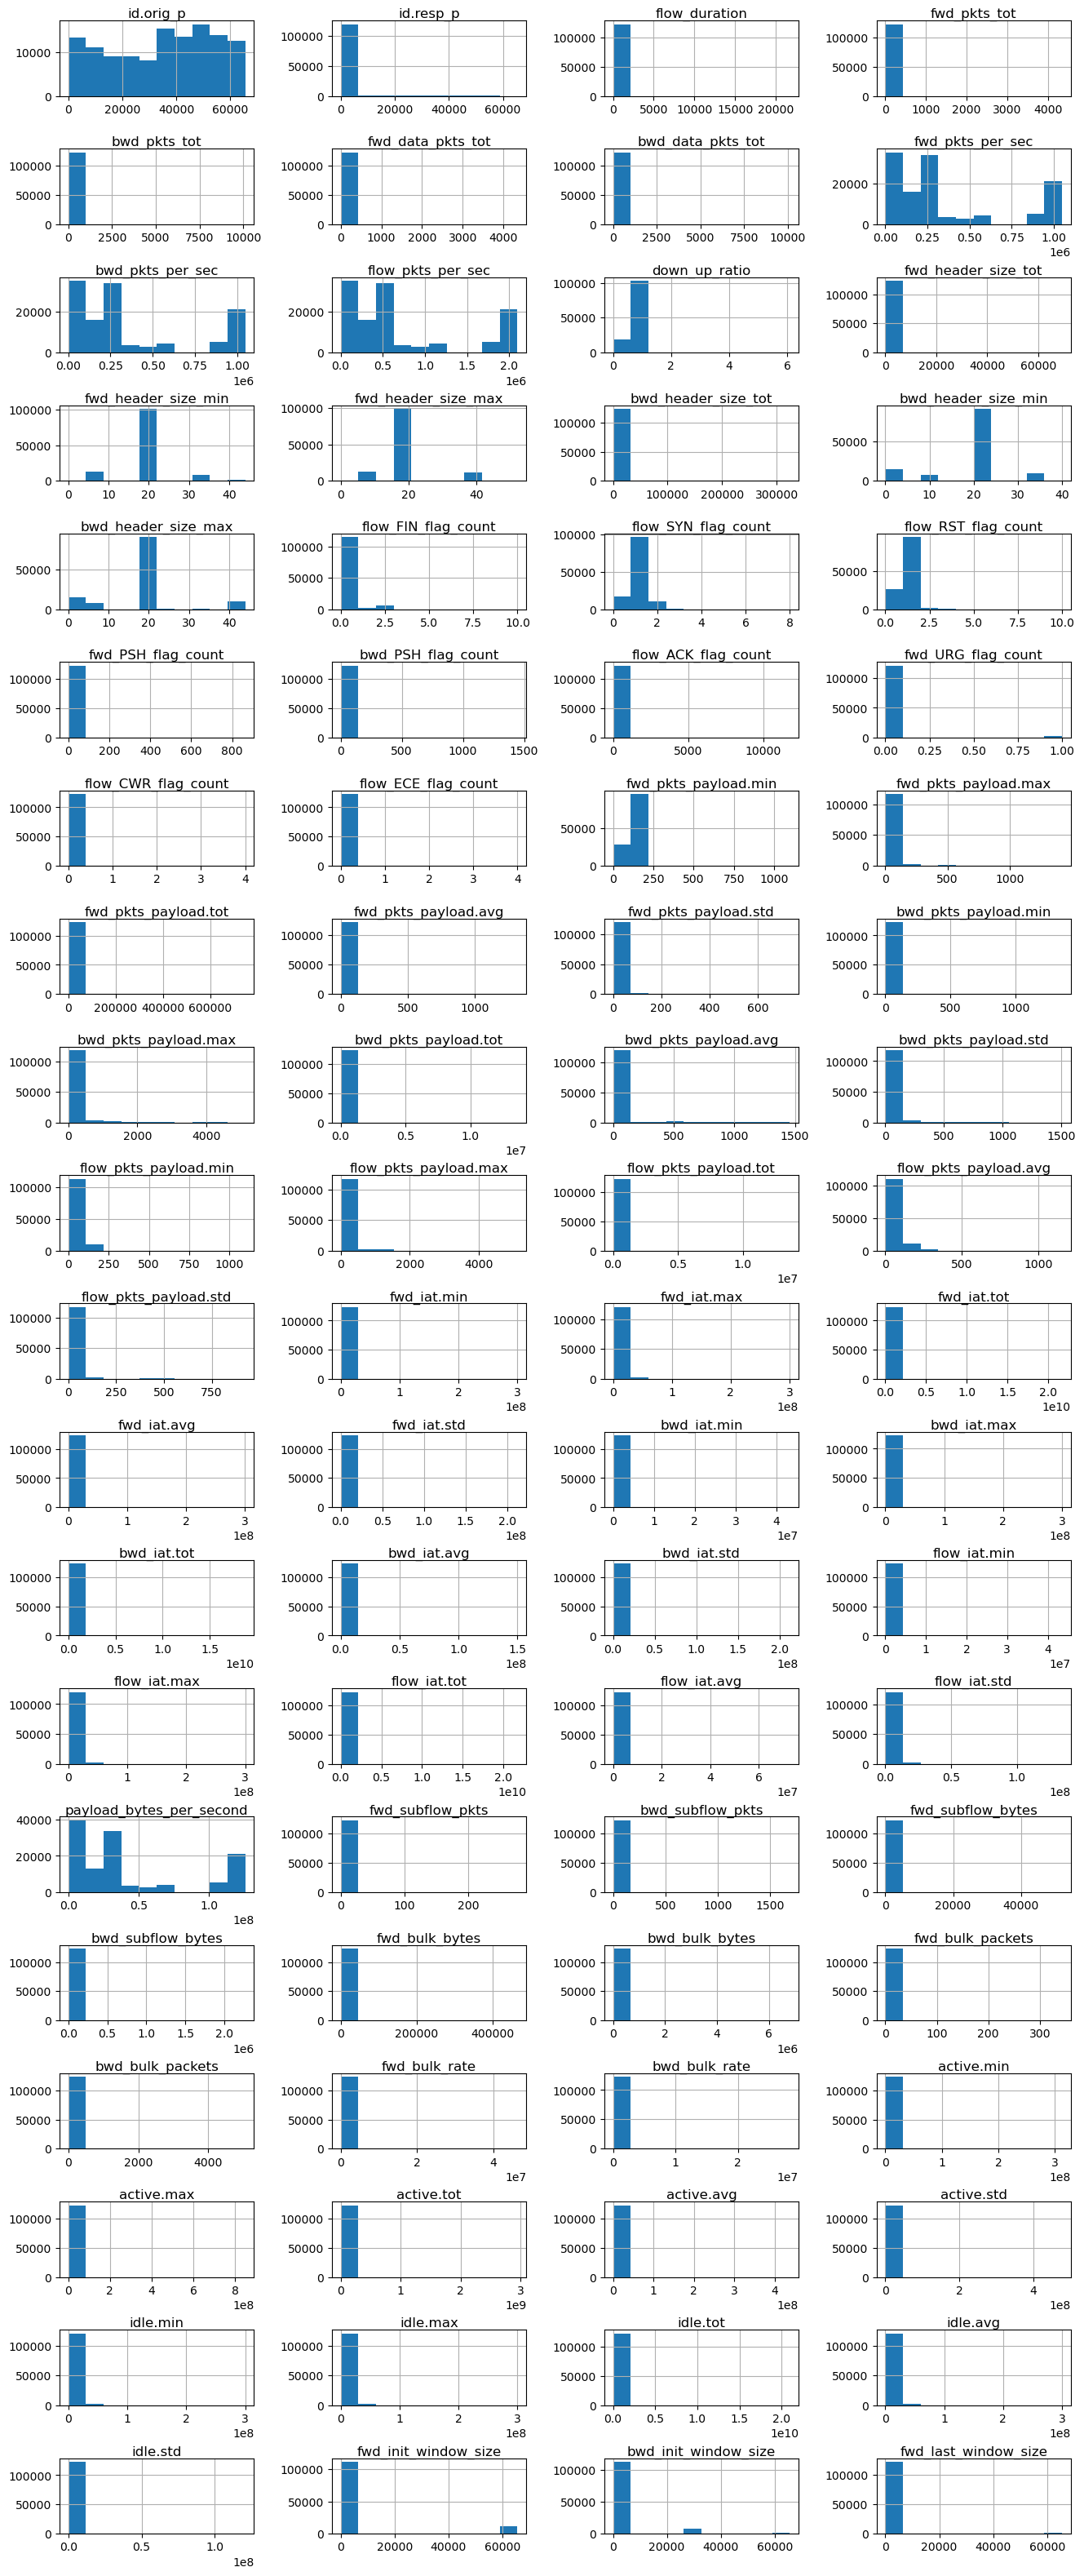

In [14]:
# Visualize distributions of all numerical features
i = 1
plt.figure(figsize=(16, 40))
for col in num_cols:
    plt.subplot(20, 4, i)
    plt.title(col, loc='center', y=.95)
    plt.subplots_adjust(hspace=.7, wspace=.4)
    data[col].hist()
    i += 1
plt.show()

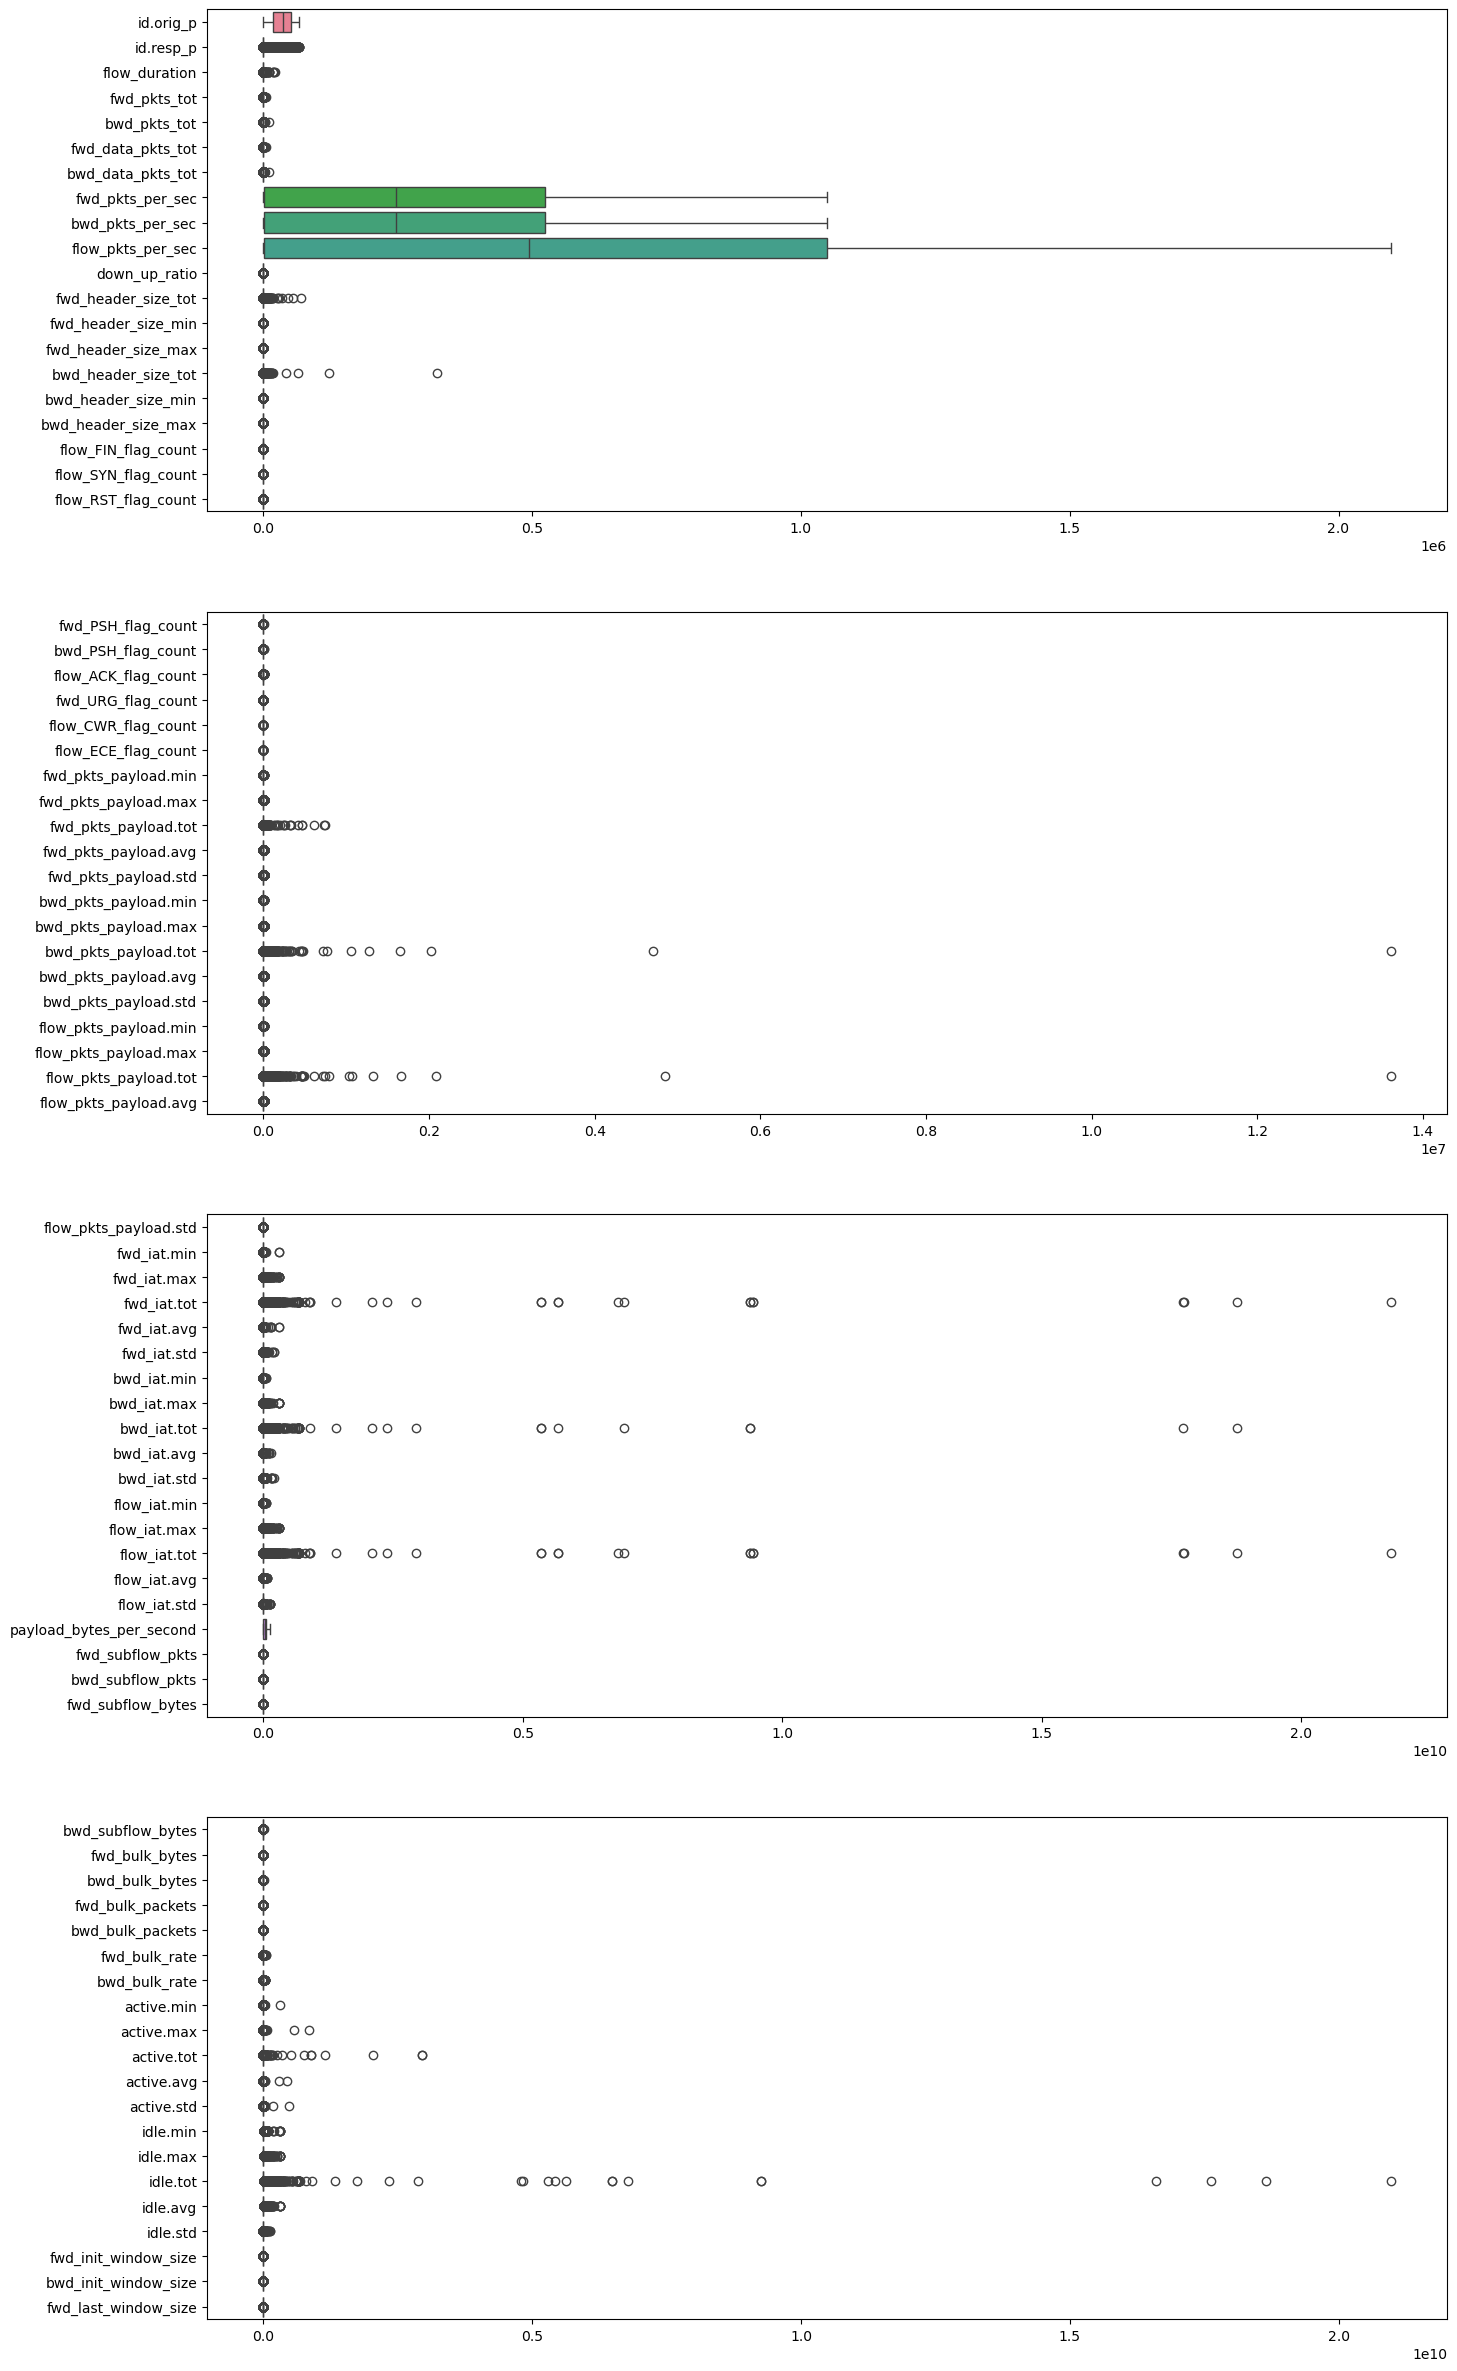

In [15]:
# Detect outliers using box plots
plt.figure(figsize=(16, 30))

plt.subplot(4, 1, 1)
sns.boxplot(data[num_cols[:20]], orient='h')
plt.subplot(4, 1, 2)
sns.boxplot(data[num_cols[20:40]], orient='h')
plt.subplot(4, 1, 3)
sns.boxplot(data[num_cols[40:60]], orient='h')
plt.subplot(4, 1, 4)
sns.boxplot(data[num_cols[60:]], orient='h')

plt.show()

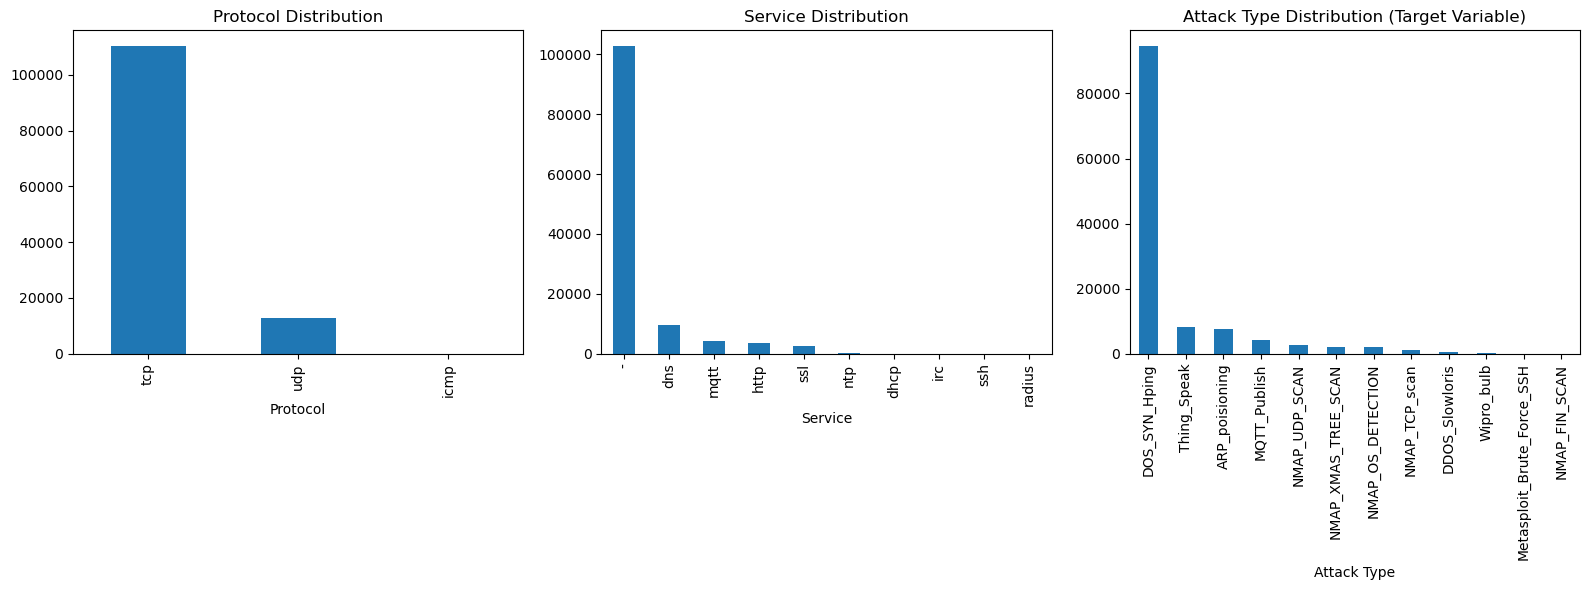

In [16]:
# Visualize categorical features and target variable
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
data['proto'].value_counts().plot(kind='bar')
plt.title('Protocol Distribution')
plt.xlabel('Protocol')

plt.subplot(1, 3, 2)
data['service'].value_counts().plot(kind='bar')
plt.title('Service Distribution')
plt.xlabel('Service')

plt.subplot(1, 3, 3)
data['Attack_type'].value_counts().plot(kind='bar')
plt.title('Attack Type Distribution (Target Variable)')
plt.xlabel('Attack Type')

plt.tight_layout()
plt.show()

In [17]:
# Handle missing service values represented as '-'
data['service'].replace('-', 'unknown', inplace=True)
print("Missing service values replaced with 'unknown'")

Missing service values replaced with 'unknown'


C:\Users\user\AppData\Local\Temp\ipykernel_21740\1950281105.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['service'].replace('-', 'unknown', inplace=True)


In [18]:
# Display unique services after replacement
print("Unique services after replacement:")
print(data['service'].unique())

Unique services after replacement:
['mqtt' 'unknown' 'http' 'dns' 'ntp' 'ssl' 'dhcp' 'irc' 'ssh' 'radius']


In [19]:
# Display summary statistics
data.describe()

,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,1.231170e+05,1.231170e+05,1.231170e+05,...,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,123117.000000,123117.000000,123117.000000
mean,34639.258738,1014.305092,3.809566,2.268826,1.909509,1.471218,0.820260,3.518063e+05,3.517620e+05,7.035683e+05,...,1.481354e+05,2.353599e+04,1.616655e+06,1.701956e+06,3.517644e+06,1.664985e+06,4.550183e+04,6118.905123,2739.776018,751.647514
std,19070.620354,5256.371994,130.005408,22.336565,33.018311,19.635196,32.293948,3.707645e+05,3.708015e+05,7.415634e+05,...,1.613007e+06,1.477935e+06,8.809396e+06,9.252337e+06,1.229508e+08,9.007064e+06,1.091361e+06,18716.313861,10018.848534,6310.183843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,17702.000000,21.000000,0.000001,1.000000,1.000000,1.000000,0.000000,7.454354e+01,7.288927e+01,1.490871e+02,...,9.536740e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
50%,37221.000000,21.000000,0.000004,1.000000,1.000000,1.000000,0.000000,2.467238e+05,2.467238e+05,4.934475e+05,...,4.053116e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
75%,50971.000000,21.000000,0.000005,1.000000,1.000000,1.000000,0.000000,5.242880e+05,5.242880e+05,1.048576e+06,...,5.006790e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
max,65535.000000,65389.000000,21728.335578,4345.000000,10112.000000,4345.000000,10105.000000,1.048576e+06,1.048576e+06,2.097152e+06,...,4.374931e+08,4.774862e+08,3.000000e+08,3.000000e+08,2.096777e+10,3.000000e+08,1.208029e+08,65535.000000,65535.000000,65535.000000


In [20]:
# Calculate correlation matrix for numerical features
corr_matrix = data[num_cols].corr()
print("Correlation matrix computed")
print(corr_matrix.shape)

Correlation matrix computed
(80, 80)


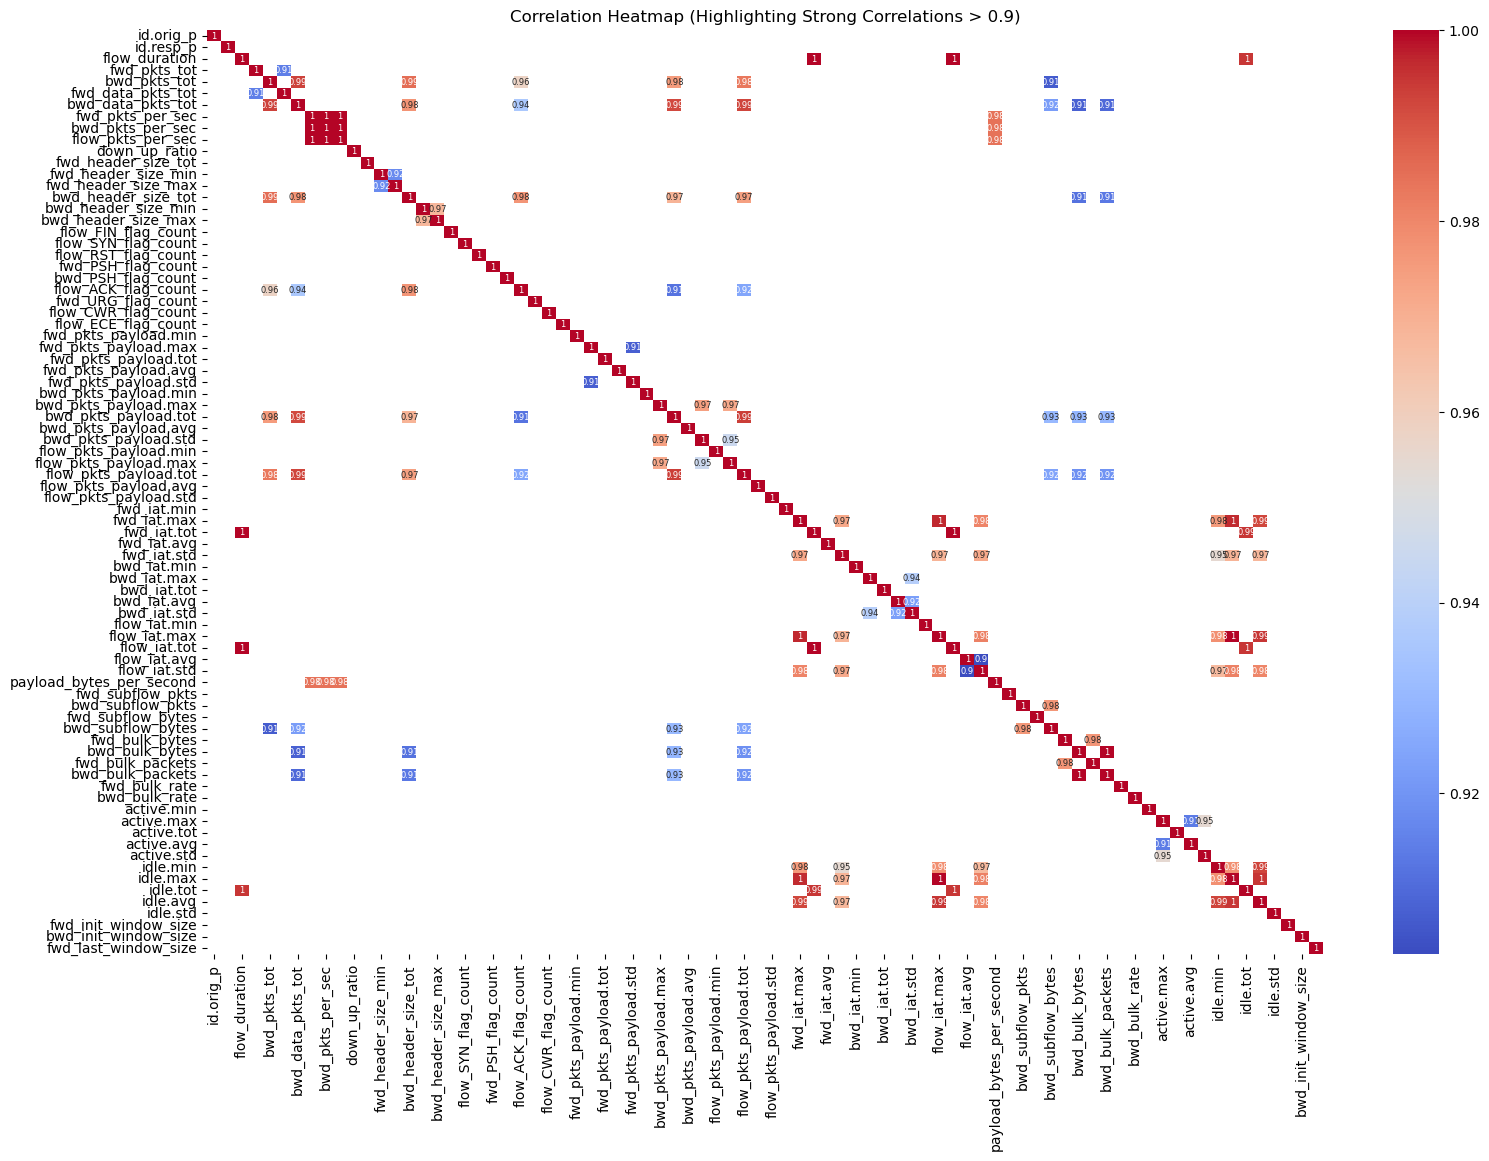

In [21]:
# Visualize correlation heatmap (mask values < 0.9 to highlight strong correlations)
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, annot_kws={"size": 6}, 
            cbar=True, yticklabels=True, mask=np.abs(corr_matrix) < 0.9)
plt.title("Correlation Heatmap (Highlighting Strong Correlations > 0.9)")
plt.show()

In [22]:
# Extract and display highest correlation pairs to identify redundant features
# Keep only upper triangle to avoid duplicate pairs
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Convert to long-form table
corr_table = (
    upper.stack()
         .reset_index()
         .rename(columns={
             "level_0": "Feature 1",
             "level_1": "Feature 2",
             0: "Correlation"
         })
         .assign(AbsCorrelation=lambda x: x["Correlation"].abs())
         .sort_values("AbsCorrelation", ascending=False)
)

# Display strongest correlations
print("Top 40 Strongest Correlations:")
print(corr_table.head(40))

Top 40 Strongest Correlations:
                 Feature 1                 Feature 2  Correlation  \
207          flow_duration              flow_iat.tot     1.000000   
604       bwd_pkts_per_sec         flow_pkts_per_sec     0.999997   
533       fwd_pkts_per_sec         flow_pkts_per_sec     0.999997   
532       fwd_pkts_per_sec          bwd_pkts_per_sec     0.999986   
3008        bwd_bulk_bytes          bwd_bulk_packets     0.999802   
2802          flow_iat.max                  idle.max     0.999748   
2503           fwd_iat.tot              flow_iat.tot     0.999719   
197          flow_duration               fwd_iat.tot     0.999719   
2466           fwd_iat.max              flow_iat.max     0.996647   
2487           fwd_iat.max                  idle.max     0.996389   
3140              idle.max                  idle.avg     0.995069   
228          flow_duration                  idle.tot     0.995023   
2829          flow_iat.tot                  idle.tot     0.995023   
280

In [23]:
# Identify highly correlated feature pairs (> 0.9)
high_corr = corr_table[corr_table['AbsCorrelation'] > 0.9]
print("Highly Correlated Feature Pairs (Correlation > 0.9):\n")
for col in num_cols:
    table = high_corr[(high_corr['Feature 1'] == col) | (high_corr['Feature 2'] == col)]
    if not table.empty:
        print(f"--- {col} ---")
        print(table)
        print()

Highly Correlated Feature Pairs (Correlation > 0.9):

--- flow_duration ---
         Feature 1     Feature 2  Correlation  AbsCorrelation
207  flow_duration  flow_iat.tot     1.000000        1.000000
197  flow_duration   fwd_iat.tot     0.999719        0.999719
228  flow_duration      idle.tot     0.995023        0.995023

--- fwd_pkts_tot ---
        Feature 1          Feature 2  Correlation  AbsCorrelation
235  fwd_pkts_tot  fwd_data_pkts_tot     0.914683        0.914683

--- bwd_pkts_tot ---
        Feature 1              Feature 2  Correlation  AbsCorrelation
311  bwd_pkts_tot      bwd_data_pkts_tot     0.992956        0.992956
319  bwd_pkts_tot    bwd_header_size_tot     0.985229        0.985229
343  bwd_pkts_tot  flow_pkts_payload.tot     0.983072        0.983072
338  bwd_pkts_tot   bwd_pkts_payload.tot     0.975332        0.975332
327  bwd_pkts_tot    flow_ACK_flag_count     0.957675        0.957675
365  bwd_pkts_tot      bwd_subflow_bytes     0.906951        0.906951

--- fwd_d

## 3. Data Preprocessing

Handle categorical variables, balance classes, scale features ,and select features.

#### handle correlated features

In [24]:
# Remove highly correlated features to reduce multicollinearity
# Strategy: Keep the first feature in correlation pairs and drop correlated ones
corr_abs = data[num_cols].corr().abs()
features = corr_abs.columns
to_drop = set()
kept = set()

for feature in features:
    if feature in to_drop:
        continue
    
    # Find all highly correlated features with current feature
    correlated = corr_abs.index[(corr_abs[feature] > 0.9) & (corr_abs.index != feature)].tolist()
    
    # Mark correlated features for removal
    for c in correlated:
        to_drop.add(c)
    
    kept.add(feature)

print(f"Features to remove due to high correlation: {len(to_drop)}")
print(to_drop)

Features to remove due to high correlation: 29
{'fwd_bulk_packets', 'bwd_pkts_payload.std', 'bwd_data_pkts_tot', 'flow_ACK_flag_count', 'fwd_pkts_payload.std', 'idle.max', 'bwd_subflow_bytes', 'bwd_header_size_tot', 'fwd_iat.std', 'flow_pkts_payload.max', 'payload_bytes_per_second', 'idle.min', 'flow_pkts_per_sec', 'fwd_data_pkts_tot', 'flow_iat.max', 'flow_iat.std', 'idle.avg', 'flow_iat.tot', 'idle.tot', 'active.avg', 'bwd_bulk_packets', 'active.std', 'bwd_iat.std', 'bwd_pkts_per_sec', 'fwd_iat.tot', 'bwd_pkts_payload.tot', 'flow_pkts_payload.tot', 'fwd_header_size_max', 'bwd_header_size_max'}


In [25]:
# Create reduced dataset without highly correlated features
reduced_df = data.drop(to_drop, axis=1)
print(f"Columns removed: {len(to_drop)}")
print(f"Remaining columns: {reduced_df.shape[1]}")

Columns removed: 29
Remaining columns: 54


In [26]:
# Verify new dataset shape
print(f"Reduced dataset shape: {reduced_df.shape}")

Reduced dataset shape: (123117, 54)


### 3.1 Handle Class Imbalance

Merge similar attack classes to reduce imbalance in the target variable.

In [27]:
# Merge minor attack types into "NORMAL" category to balance classes
# These are different IoT-specific normal traffic patterns
data["Attack_type"] = data["Attack_type"].replace(
    {"MQTT_Publish": "NORMAL", "Thing_Speak": "NORMAL", "Wipro_bulb": "NORMAL"}
)
print("Attack types merged - MQTT_Publish, Thing_Speak, Wipro_bulb now classified as NORMAL")

Attack types merged - MQTT_Publish, Thing_Speak, Wipro_bulb now classified as NORMAL


In [28]:
# Apply same class merging to the reduced dataset
reduced_df["Attack_type"] = reduced_df["Attack_type"].replace(
    {"MQTT_Publish": "NORMAL", "Thing_Speak": "NORMAL", "Wipro_bulb": "NORMAL"}
)
print("Class merging applied to reduced dataset")

Class merging applied to reduced dataset


In [29]:
# Display final class distribution
print("Final Attack_type distribution:")
print(data['Attack_type'].unique())

Final Attack_type distribution:
['NORMAL' 'ARP_poisioning' 'DDOS_Slowloris' 'DOS_SYN_Hping'
 'Metasploit_Brute_Force_SSH' 'NMAP_FIN_SCAN' 'NMAP_OS_DETECTION'
 'NMAP_TCP_scan' 'NMAP_UDP_SCAN' 'NMAP_XMAS_TREE_SCAN']


In [30]:
# Import encoding and scaling utilities
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight

### 3.2 Encode Categorical Variables

Use Label Encoding for tree-based models and One-Hot Encoding for linear models.

In [31]:
# Initialize encoders
ohe = OneHotEncoder(sparse_output=False)  # For one-hot encoding of categorical features
le = LabelEncoder()  # For label encoding

In [32]:
# Fit encoders on data
ohe = OneHotEncoder(sparse_output=False)
le = LabelEncoder()

In [33]:
# Label encode target variable and compute class weights for imbalance handling
reduced_df['Attack_type'] = le.fit_transform(reduced_df['Attack_type'])

classes = reduced_df['Attack_type'].unique()
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=reduced_df['Attack_type']
)

# Create a dictionary mapping class to weight for model training
cw = dict(zip(classes, class_weights))
print("Class weights computed for balanced training:")
print(cw)

Class weights computed for balanced training:
{np.int64(9): np.float64(0.9843847445430559), np.int64(0): np.float64(1.5886064516129033), np.int64(1): np.float64(23.05561797752809), np.int64(2): np.float64(0.13006370234209108), np.int64(3): np.float64(332.74864864864867), np.int64(4): np.float64(439.7035714285714), np.int64(5): np.float64(6.15585), np.int64(6): np.float64(12.287125748502994), np.int64(7): np.float64(4.753552123552123), np.int64(8): np.float64(6.125223880597015)}


In [34]:
# One-hot encode categorical features for linear models
categories = ['proto', 'service']
ohe_trans = ohe.fit_transform(reduced_df[categories])
ohe_df = pd.DataFrame(ohe_trans, columns=ohe.get_feature_names_out(categories))

# Concatenate one-hot encoded features with original dataframe
reduced_df = pd.concat([ohe_df, reduced_df], axis=1)
print(f"One-hot encoding completed. New shape: {reduced_df.shape}")
reduced_df

One-hot encoding completed. New shape: (123117, 67)


,proto_icmp,proto_tcp,proto_udp,service_dhcp,service_dns,service_http,service_irc,service_mqtt,service_ntp,service_radius,...,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.282415e+06,2.282415e+06,2.282415e+06,0.0,64240,26847,502,9
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.028307e+06,2.028307e+06,2.028307e+06,0.0,64240,26847,502,9
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.281904e+06,2.281904e+06,2.281904e+06,0.0,64240,26847,502,9
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.047288e+06,2.047288e+06,2.047288e+06,0.0,64240,26847,502,9
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.087657e+06,2.087657e+06,2.087657e+06,0.0,64240,26847,502,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.960464e+00,5.960464e+00,5.960464e+00,0.0,1024,0,1024,8
123113,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.914139e+00,6.914139e+00,6.914139e+00,0.0,1024,0,1024,8
123114,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.960464e+00,5.960464e+00,5.960464e+00,0.0,1024,0,1024,8
123115,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.960464e+00,5.960464e+00,5.960464e+00,0.0,1024,0,1024,8


In [35]:
# Remove original categorical columns (now encoded)
reduced_df = reduced_df.drop(['service', 'proto'], axis=1)
print("Original categorical columns removed")

Original categorical columns removed


In [36]:
# Check data types
reduced_df.dtypes.value_counts()

float64    46
int64      19
Name: count, dtype: int64

In [37]:
# Label encode categorical variables in original dataset for tree-based models
# This maintains the original data structure for comparison
categories = ['proto', 'service', 'Attack_type']
label_encoders = {}  # Dictionary to store separate encoders for later use

for cat in categories:
    le_temp = LabelEncoder()  # Create a new encoder for each column
    data[cat] = le_temp.fit_transform(data[cat])
    label_encoders[cat] = le_temp  # Save each encoder separately

print("Label encoding completed for original dataset (tree-based models)")

Label encoding completed for original dataset (tree-based models)


### 3.3 Feature Scaling

Standardize numerical features for distance-based models.

In [38]:
# Initialize StandardScaler for normalization
from sklearn.preprocessing import StandardScaler

In [39]:
# Create scaler instance
scaler = StandardScaler()

In [40]:
# Separate features and target
x = reduced_df.drop('Attack_type', axis=1)
y_enc = reduced_df['Attack_type']
print(f"Features shape: {x.shape}")
print(f"Target shape: {y_enc.shape}")

Features shape: (123117, 64)
Target shape: (123117,)


In [41]:
# Scale features using standardization (mean=0, std=1)
X = scaler.fit_transform(x)
X = pd.DataFrame(X, columns=x.columns, index=x.index)
print(f"Features scaled. New shape: {X.shape}")
X

Features scaled. New shape: (123117, 64)


,proto_icmp,proto_tcp,proto_udp,service_dhcp,service_dns,service_http,service_irc,service_mqtt,service_ntp,service_radius,...,bwd_bulk_bytes,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,-0.021522,0.338995,-0.338145,-0.020156,-0.293313,-0.170148,-0.018692,5.366189,-0.031365,-0.004031,...,-0.007923,-0.012452,-0.070653,2.061981,0.698534,0.137655,-0.041693,3.105383,2.406197,-0.039563
1,-0.021522,0.338995,-0.338145,-0.020156,-0.293313,-0.170148,-0.018692,5.366189,-0.031365,-0.004031,...,-0.007923,-0.012452,-0.070653,1.818192,0.614162,0.120073,-0.041693,3.105383,2.406197,-0.039563
2,-0.021522,0.338995,-0.338145,-0.020156,-0.293313,-0.170148,-0.018692,5.366189,-0.031365,-0.004031,...,-0.007923,-0.012452,-0.070653,2.061491,0.698364,0.137619,-0.041693,3.105383,2.406197,-0.039563
3,-0.021522,0.338995,-0.338145,-0.020156,-0.293313,-0.170148,-0.018692,5.366189,-0.031365,-0.004031,...,-0.007923,-0.012452,-0.070653,1.836403,0.620465,0.121386,-0.041693,3.105383,2.406197,-0.039563
4,-0.021522,0.338995,-0.338145,-0.020156,-0.293313,-0.170148,-0.018692,5.366189,-0.031365,-0.004031,...,-0.007923,-0.012452,-0.070653,1.875132,0.633868,0.124179,-0.041693,3.105383,2.406197,-0.039563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,-0.021522,0.338995,-0.338145,-0.020156,-0.293313,-0.170148,-0.018692,-0.186352,-0.031365,-0.004031,...,-0.007923,-0.012452,-0.070653,-0.127742,-0.059295,-0.020268,-0.041693,-0.272218,-0.273463,0.043161
123113,-0.021522,0.338995,-0.338145,-0.020156,-0.293313,-0.170148,-0.018692,-0.186352,-0.031365,-0.004031,...,-0.007923,-0.012452,-0.070653,-0.127741,-0.059295,-0.020268,-0.041693,-0.272218,-0.273463,0.043161
123114,-0.021522,0.338995,-0.338145,-0.020156,-0.293313,-0.170148,-0.018692,-0.186352,-0.031365,-0.004031,...,-0.007923,-0.012452,-0.070653,-0.127742,-0.059295,-0.020268,-0.041693,-0.272218,-0.273463,0.043161
123115,-0.021522,0.338995,-0.338145,-0.020156,-0.293313,-0.170148,-0.018692,-0.186352,-0.031365,-0.004031,...,-0.007923,-0.012452,-0.070653,-0.127742,-0.059295,-0.020268,-0.041693,-0.272218,-0.273463,0.043161


### 3.4 Handle Outliers

Detect and manage extreme values that could affect model performance.

In [42]:
# Handle infinite values if any exist (replace with NaN for inspection)
X.replace([np.inf, -np.inf], np.nan, inplace=True)
nan_counts = X.isna().sum()

print("Infinite values detected and converted to NaN:")
print(nan_counts[nan_counts > 0] if nan_counts.sum() > 0 else "No infinite values found")
print("\nNote: For intrusion detection, outliers represent potentially anomalous traffic")
print("and are retained in the model training (not removed)")

Infinite values detected and converted to NaN:
No infinite values found

Note: For intrusion detection, outliers represent potentially anomalous traffic
and are retained in the model training (not removed)


### 3.5 Feature Selection

Identify most relevant features using statistical tests and correlation analysis.

In [43]:
# Import feature selection and model splitting utilities
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

In [44]:
# Split data into train and test sets with stratification to preserve class distribution
X_train, X_test, Y_train_enc, Y_test_enc = train_test_split(
    X, y_enc, test_size=0.3, stratify=y_enc, random_state=2
)
print(f"Train set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Train set size: (86181, 64)
Test set size: (36936, 64)


In [45]:
# Select top 40 features based on f-classif (ANOVA F-value)
selector = SelectKBest(score_func=f_classif, k=40)
X_train_kbest = selector.fit_transform(X_train, Y_train_enc)
X_test_kbest = selector.transform(X_test)

# Get names of selected features
selected_features = X.columns[selector.get_support()]
print(f"Selected {len(selected_features)} features:")
print(selected_features.tolist())

Selected 40 features:
['proto_tcp', 'proto_udp', 'service_dns', 'service_http', 'service_mqtt', 'service_ssh', 'service_ssl', 'service_unknown', 'id.orig_p', 'id.resp_p', 'fwd_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot', 'fwd_header_size_min', 'bwd_header_size_min', 'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count', 'fwd_URG_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.avg', 'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.avg', 'flow_pkts_payload.min', 'flow_pkts_payload.avg', 'flow_pkts_payload.std', 'fwd_iat.max', 'fwd_iat.avg', 'bwd_iat.max', 'bwd_iat.avg', 'flow_iat.avg', 'fwd_subflow_pkts', 'active.min', 'active.max', 'fwd_init_window_size', 'bwd_init_window_size', 'fwd_last_window_size']


In [46]:
# Create preprocessed dataset with selected features
X_preprocessed = X[selected_features]
print(f"Preprocessed dataset shape: {X_preprocessed.shape}")
X_preprocessed

Preprocessed dataset shape: (123117, 40)


,proto_tcp,proto_udp,service_dns,service_http,service_mqtt,service_ssh,service_ssl,service_unknown,id.orig_p,id.resp_p,...,fwd_iat.avg,bwd_iat.max,bwd_iat.avg,flow_iat.avg,fwd_subflow_pkts,active.min,active.max,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,0.338995,-0.338145,-0.293313,-0.170148,5.366189,-0.015082,-0.148688,-2.253453,0.211202,0.165266,...,1.985965,0.257418,0.381744,2.655211,0.533056,2.061981,0.698534,3.105383,2.406197,-0.039563
1,0.338995,-0.338145,-0.293313,-0.170148,5.366189,-0.015082,-0.148688,-2.253453,0.865405,0.165266,...,1.977523,0.272514,0.347545,2.643954,0.533056,1.818192,0.614162,3.105383,2.406197,-0.039563
2,0.338995,-0.338145,-0.293313,-0.170148,5.366189,-0.015082,-0.148688,-2.253453,0.530753,0.165266,...,1.993382,0.249106,0.378869,2.665099,0.533056,2.061491,0.698364,3.105383,2.406197,-0.039563
3,0.338995,-0.338145,-0.293313,-0.170148,5.366189,-0.015082,-0.148688,-2.253453,1.376665,0.165266,...,1.982632,0.266791,0.349258,2.650767,0.533056,1.836403,0.620465,3.105383,2.406197,-0.039563
4,0.338995,-0.338145,-0.293313,-0.170148,5.366189,-0.015082,-0.148688,-2.253453,0.862468,0.165266,...,1.978761,0.285490,0.361149,2.645606,0.533056,1.875132,0.633868,3.105383,2.406197,-0.039563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,0.338995,-0.338145,-0.293313,-0.170148,-0.186352,-0.015082,-0.148688,0.443763,1.290353,11.855506,...,-0.125232,-0.095072,-0.079869,-0.159635,-0.203064,-0.127742,-0.059295,-0.272218,-0.273463,0.043161
123113,0.338995,-0.338145,-0.293313,-0.170148,-0.186352,-0.015082,-0.148688,0.443763,1.290353,12.101304,...,-0.125232,-0.095072,-0.079869,-0.159634,-0.203064,-0.127741,-0.059295,-0.272218,-0.273463,0.043161
123114,0.338995,-0.338145,-0.293313,-0.170148,-0.186352,-0.015082,-0.148688,0.443763,1.290353,12.112148,...,-0.125232,-0.095072,-0.079869,-0.159635,-0.203064,-0.127742,-0.059295,-0.272218,-0.273463,0.043161
123115,0.338995,-0.338145,-0.293313,-0.170148,-0.186352,-0.015082,-0.148688,0.443763,1.290353,12.173026,...,-0.125232,-0.095072,-0.079869,-0.159635,-0.203064,-0.127742,-0.059295,-0.272218,-0.273463,0.043161


## 4. Model Training and Evaluation

Train multiple machine learning models and compare their performance on classification metrics.

### 4.1 Model Initialization

Define models for both scaled (linear) and raw (tree-based) data.

In [47]:
# Prepare raw data (label-encoded) for tree-based models
X_raw = data.drop('Attack_type', axis=1)
y_raw = data['Attack_type']

print("Raw data prepared for tree-based models:")
print(f"X_raw shape: {X_raw.shape}")
print(f"y_raw shape: {y_raw.shape}")

Raw data prepared for tree-based models:
X_raw shape: (123117, 82)
y_raw shape: (123117,)


In [48]:
# Install required gradient boosting libraries
import subprocess
import sys

packages = ['xgboost', 'lightgbm', 'catboost']
for package in packages:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])

print("All required packages installed")

All required packages installed


In [49]:
# Import all required libraries for model training and evaluation
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score,
    confusion_matrix, roc_auc_score, roc_curve, classification_report
)

# Linear and distance-based models 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC        
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Tree-based models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Gradient boosting models
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

print("All model libraries imported successfully")

All model libraries imported successfully


In [50]:
# Split preprocessed data for linear models
X_proc_train, X_proc_test, y_enc_train, y_enc_test = train_test_split(
    X_preprocessed, y_enc, test_size=0.3, stratify=y_enc, random_state=2
)

# Split raw data for tree-based models
X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(
    X_raw, y_raw, test_size=0.3, stratify=y_raw, random_state=2
)

print(f"Preprocessed train/test split: {X_proc_train.shape} / {X_proc_test.shape}")
print(f"Raw train/test split: {X_raw_train.shape} / {X_raw_test.shape}")

Preprocessed train/test split: (86181, 40) / (36936, 40)
Raw train/test split: (86181, 82) / (36936, 82)


In [51]:
# Define linear models for scaled data (linear regression and distance-based)
models_proc = {
    "LogisticRegression": LogisticRegression(max_iter=500, class_weight=cw, n_jobs=-1),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "GaussianNB": GaussianNB(),
    "SDG":SGDClassifier(
        loss="hinge",
        class_weight=cw,
        random_state=2
    )
    # LinearSVC excluded due to long training time, but can be enabled if needed
}

print("Linear models initialized")

Linear models initialized


In [52]:
# Define tree-based and ensemble models for raw data
models_raw = {
    "DecisionTree": DecisionTreeClassifier(class_weight=cw, random_state=2),
    "RandomForest": RandomForestClassifier(n_estimators=100, class_weight=cw, n_jobs=-1, random_state=2),
    "XGBoost": xgb.XGBClassifier(
        objective="multi:softprob",
        eval_metric="mlogloss",
        n_estimators=100,
        n_jobs=-1,
        random_state=2
    ),
    "LightGBM": lgb.LGBMClassifier(
        n_estimators=100, class_weight=cw, n_jobs=-1, 
        force_row_wise=True, verbosity=-1, random_state=2
    ),
    "CatBoost": CatBoostClassifier(
        iterations=100,
        class_weights=list(cw.values()),
        verbose=0,
        random_state=2
    ),
    "ExtraTrees": ExtraTreesClassifier(
        n_estimators=100,
        class_weight=cw,
        n_jobs=-1,
        random_state=2
    )
    # GradientBoosting excluded due to training time, but can be enabled
}

print("Tree-based models initialized")

Tree-based models initialized


In [53]:
# Train linear models and evaluate on test set
print("="*60)
print("LINEAR MODELS (Preprocessed Data)")
print("="*60)

trained_proc = {}

for name, model in models_proc.items():
    model.fit(X_proc_train, y_enc_train)
    preds = model.predict(X_proc_test)
    
    print(f"\n{name}")
    print(f"  Accuracy: {accuracy_score(y_enc_test, preds):.4f}")
    print(f"  F1-Score (macro): {f1_score(y_enc_test, preds, average='macro'):.4f}")
    print(f"  Recall (macro): {recall_score(y_enc_test, preds, average='macro'):.4f}")
    
    trained_proc[name] = model

LINEAR MODELS (Preprocessed Data)

LogisticRegression
  Accuracy: 0.9848
  F1-Score (macro): 0.8088
  Recall (macro): 0.9659

KNN
  Accuracy: 0.9967
  F1-Score (macro): 0.9697
  Recall (macro): 0.9813

GaussianNB
  Accuracy: 0.8948
  F1-Score (macro): 0.6059
  Recall (macro): 0.8583

SDG
  Accuracy: 0.9778
  F1-Score (macro): 0.7752
  Recall (macro): 0.9534


In [54]:
# Train tree-based models and evaluate on test set
print("="*60)
print("TREE-BASED MODELS (Raw Data)")
print("="*60)

trained_raw = {}

for name, model in models_raw.items():
    model.fit(X_raw_train, y_raw_train)
    preds = model.predict(X_raw_test)
    
    print(f"\n{name}")
    print(f"  Accuracy: {accuracy_score(y_raw_test, preds):.4f}")
    print(f"  F1-Score (macro): {f1_score(y_raw_test, preds, average='macro'):.4f}")
    print(f"  Recall (macro): {recall_score(y_raw_test, preds, average='macro'):.4f}")
    
    trained_raw[name] = model

TREE-BASED MODELS (Raw Data)

DecisionTree
  Accuracy: 0.9979
  F1-Score (macro): 0.9616
  Recall (macro): 0.9865

RandomForest
  Accuracy: 0.9981
  F1-Score (macro): 0.9748
  Recall (macro): 0.9835

XGBoost
  Accuracy: 0.9987
  F1-Score (macro): 0.9870
  Recall (macro): 0.9875

LightGBM
  Accuracy: 0.9988
  F1-Score (macro): 0.9742
  Recall (macro): 0.9879

CatBoost
  Accuracy: 0.9937
  F1-Score (macro): 0.8306
  Recall (macro): 0.8716

ExtraTrees
  Accuracy: 0.9983
  F1-Score (macro): 0.9751
  Recall (macro): 0.9853


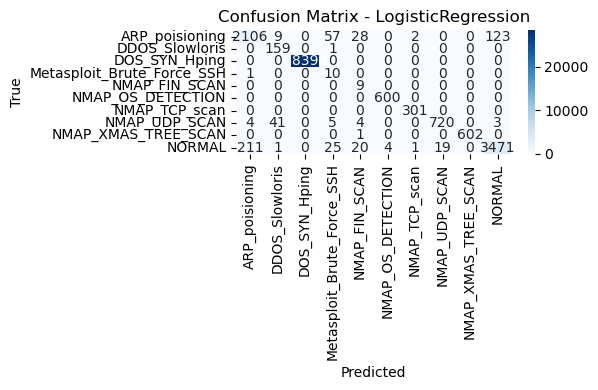

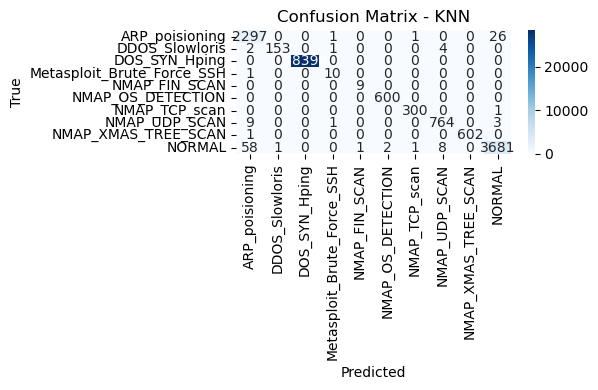

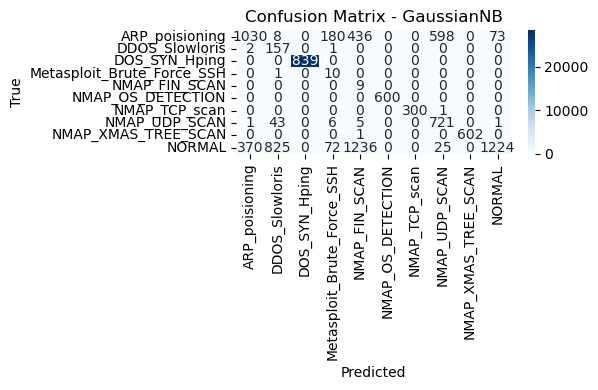

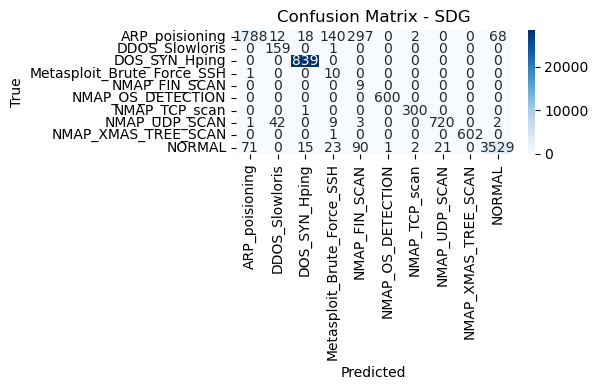

In [55]:
# Visualize confusion matrices for linear models
for name, model in trained_proc.items():
    preds = model.predict(X_proc_test)
    cm = confusion_matrix(y_enc_test, preds)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

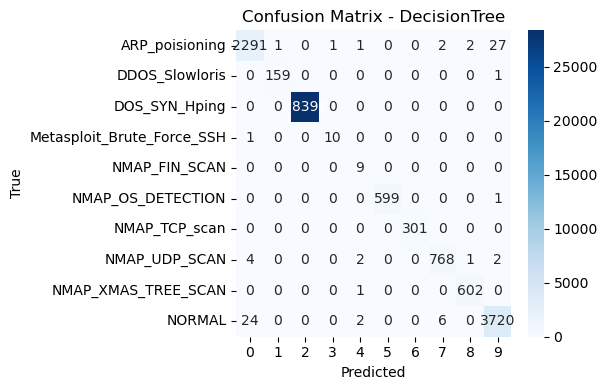

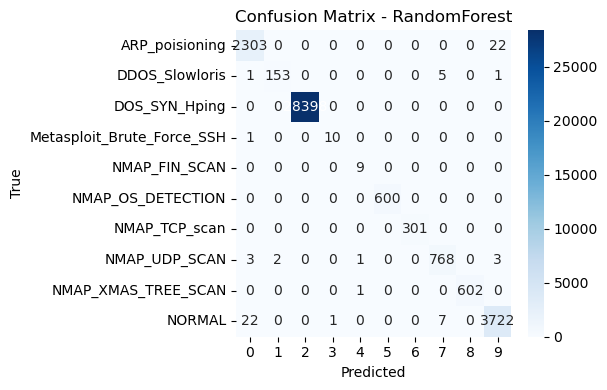

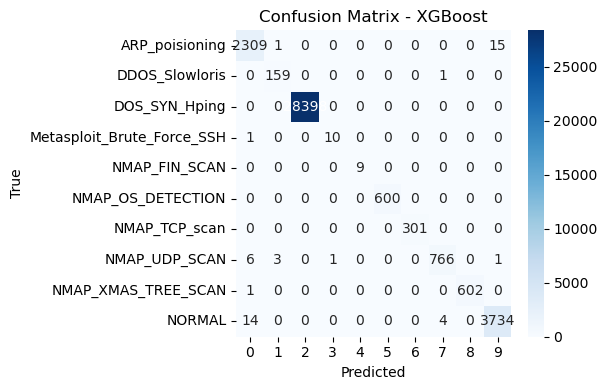

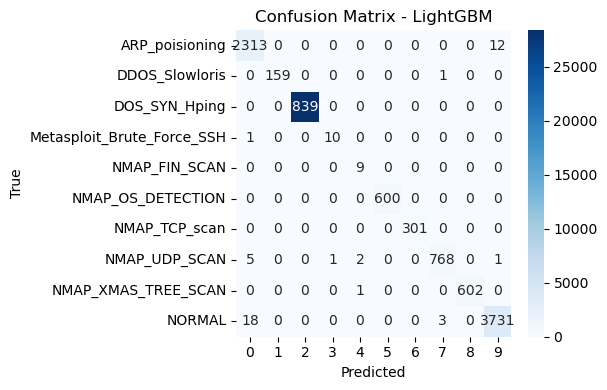

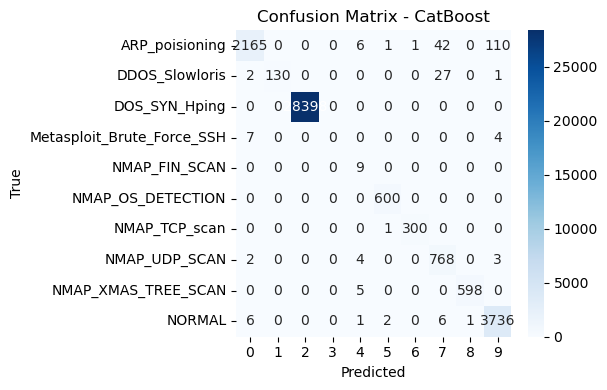

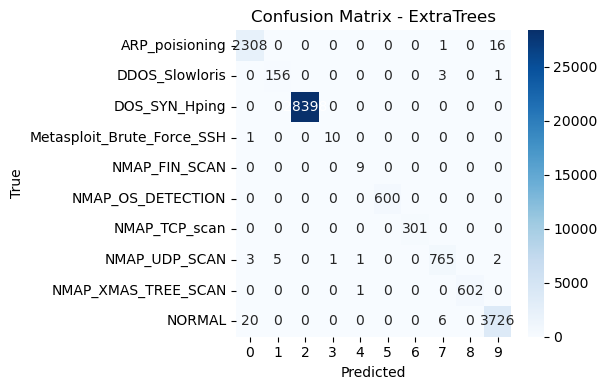

In [56]:
# Visualize confusion matrices for tree-based models
for name, model in trained_raw.items():
    preds = model.predict(X_raw_test)
    cm = confusion_matrix(y_raw_test, preds)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

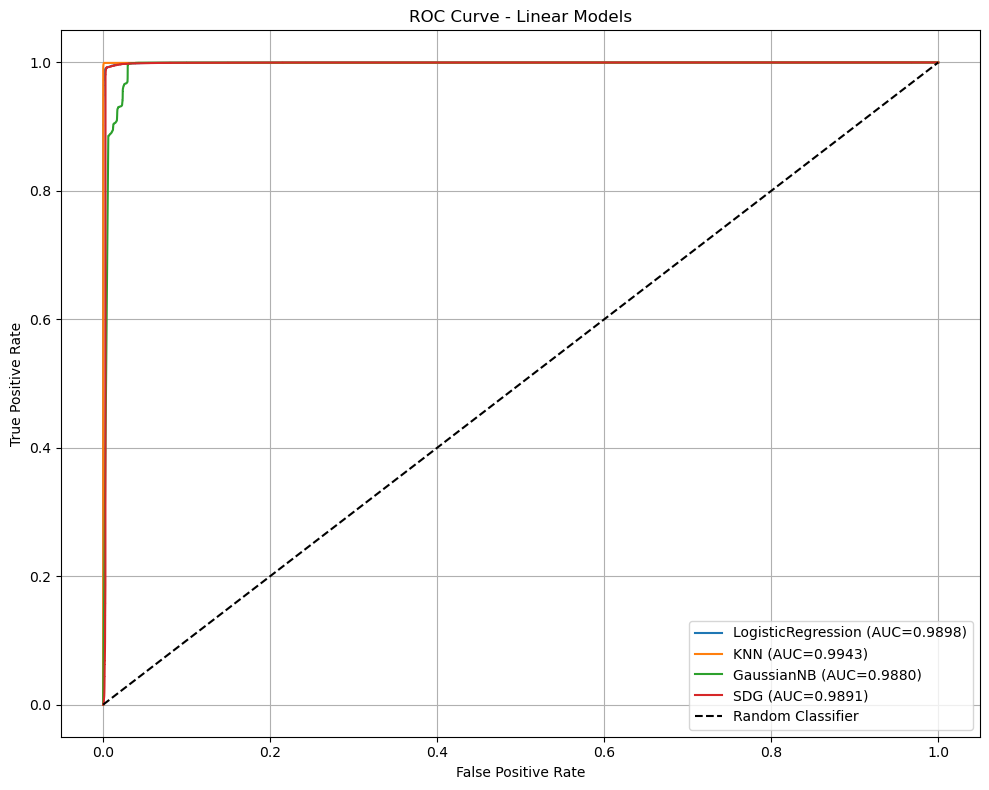

In [57]:
# Plot ROC curves for linear models using multi-class evaluation
plt.figure(figsize=(10, 8))

classes = np.unique(y_enc_test)
y_bin = label_binarize(y_enc_test, classes=classes)

for name, model in trained_proc.items():
    # Get probability predictions or decision function
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_proc_test)
    else:
        probs = model.decision_function(X_proc_test)
    
    # Calculate AUC score
    auc = roc_auc_score(y_bin, probs, average="macro", multi_class="ovr")
    fpr, tpr, _ = roc_curve(y_bin.ravel(), probs.ravel())
    
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.4f})")

# Plot random classifier baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Linear Models")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### 4.2 Cross-Validation

Evaluate model stability and generalization using stratified k-fold cross-validation.

In [58]:
# Perform stratified k-fold cross-validation (3 splits)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=2)

print("\n" + "="*60)
print("CROSS-VALIDATION RESULTS (F1-Score, Macro)")
print("="*60 + "\n")

# Linear models
print("Linear Models:")
for name, model in models_proc.items():
    scores = cross_val_score(model, X_preprocessed, y_enc, cv=cv, scoring="f1_macro")
    print(f"  {name}: {scores.mean():.4f} (+/- {scores.std():.4f})")

# Tree-based models
print("\nTree-Based Models:")
for name, model in models_raw.items():
    scores = cross_val_score(model, X_raw, y_raw, cv=cv, scoring="f1_macro")
    print(f"  {name}: {scores.mean():.4f} (+/- {scores.std():.4f})")


CROSS-VALIDATION RESULTS (F1-Score, Macro)

Linear Models:
  LogisticRegression: 0.8189 (+/- 0.0178)
  KNN: 0.9607 (+/- 0.0086)
  GaussianNB: 0.6219 (+/- 0.0152)
  SDG: 0.8072 (+/- 0.0067)

Tree-Based Models:
  DecisionTree: 0.9516 (+/- 0.0180)
  RandomForest: 0.9662 (+/- 0.0125)
  XGBoost: 0.9654 (+/- 0.0116)
  LightGBM: 0.9721 (+/- 0.0075)
  CatBoost: 0.8329 (+/- 0.0005)
  ExtraTrees: 0.9594 (+/- 0.0114)


## 5. Hyperparameter Optimization

Fine-tune the best-performing models using random search to improve performance.

In [59]:
# Import hyperparameter optimization tool
from sklearn.model_selection import RandomizedSearchCV

### 5.1 Define Hyperparameter Grids

In [60]:
# RandomForest hyperparameter grid
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

In [61]:
# LightGBM hyperparameter grid
lgb_param_grid = {
    "num_leaves": [31, 63, 127],
    "max_depth": [-1, 6, 10],
    "learning_rate": [0.05, 0.1],
    "n_estimators": [100, 200],
    "min_child_samples": [20, 50],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

### 5.2 RandomSearch for RandomForest

In [62]:
# Perform random search for RandomForest optimization
rf = RandomForestClassifier(
    class_weight=cw,
    n_jobs=-1,
    random_state=2
)

rf_search = RandomizedSearchCV(
    rf,
    rf_param_grid,
    n_iter=15,  # Test 15 random combinations
    scoring="f1_macro",
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,
    verbose=1,
    random_state=2
)

print("Starting RandomForest hyperparameter optimization...")
rf_search.fit(X_raw_train, y_raw_train)
print("RandomForest optimization completed")

Starting RandomForest hyperparameter optimization...
Fitting 3 folds for each of 15 candidates, totalling 45 fits
RandomForest optimization completed


In [63]:
# Perform random search for LightGBM optimization
lgb_model = lgb.LGBMClassifier(
    class_weight=cw,
    n_jobs=-1,
    force_row_wise=True,
    verbosity=-1,
    random_state=2
)

lgb_search = RandomizedSearchCV(
    lgb_model,
    lgb_param_grid,
    n_iter=15,  # Test 15 random combinations
    scoring="f1_macro",
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,
    verbose=1,
    random_state=2
)

print("Starting LightGBM hyperparameter optimization...")
lgb_search.fit(X_raw_train, y_raw_train)
print("LightGBM optimization completed")

Starting LightGBM hyperparameter optimization...
Fitting 3 folds for each of 15 candidates, totalling 45 fits
LightGBM optimization completed


### 5.3 Best Parameters and Performance

Display optimal parameters and cross-validation scores for both models.

In [64]:
# Display best parameters and score for RandomForest
best_rf = rf_search.best_estimator_
print("="*60)
print("RANDOM FOREST - BEST HYPERPARAMETERS")
print("="*60)
print(f"Best Parameters: {rf_search.best_params_}")
print(f"Best CV Score (F1-macro): {rf_search.best_score_:.4f}")

RANDOM FOREST - BEST HYPERPARAMETERS
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Best CV Score (F1-macro): 0.9560


In [65]:
# Display best parameters and score for LightGBM
best_lgb = lgb_search.best_estimator_
print("\n" + "="*60)
print("LIGHTGBM - BEST HYPERPARAMETERS")
print("="*60)
print(f"Best Parameters: {lgb_search.best_params_}")
print(f"Best CV Score (F1-macro): {lgb_search.best_score_:.4f}")


LIGHTGBM - BEST HYPERPARAMETERS
Best Parameters: {'subsample': 0.8, 'num_leaves': 127, 'n_estimators': 200, 'min_child_samples': 50, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best CV Score (F1-macro): 0.9616


### 5.4 Feature Importance Analysis

Extract and filter important features for user-friendly interface deployment.

In [66]:
# Prepare for feature importance analysis using the best LightGBM model
X = X_raw  # Raw data (label-encoded) 
model = best_lgb  # Best optimized LightGBM model
threshold = 0.85  # Correlation threshold for removing redundant features

print("Extracting feature importance from optimized LightGBM model...")

Extracting feature importance from optimized LightGBM model...


In [67]:
# Extract feature importance scores
importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print(f"\nTop 20 Important Features:")
print(importance.head(20))


Top 20 Important Features:
id.orig_p                   5260
id.resp_p                   2461
flow_iat.min                2428
fwd_pkts_payload.min        1444
flow_duration               1413
fwd_pkts_per_sec            1230
flow_pkts_payload.tot       1075
fwd_iat.min                 1001
bwd_pkts_per_sec             972
flow_pkts_payload.min        903
payload_bytes_per_second     883
bwd_iat.min                  871
active.min                   813
flow_pkts_payload.avg        790
fwd_pkts_payload.tot         733
flow_pkts_payload.max        686
service                      672
bwd_pkts_payload.min         602
flow_pkts_payload.std        576
fwd_pkts_payload.avg         557
dtype: int32


In [68]:
# Calculate correlation matrix for feature redundancy analysis
corr = X.corr().abs()

In [69]:
# Select important features while removing highly correlated ones
# This reduces feature set for deployment without losing predictive power
selected_features = []
removed_features = set()

for feature in importance.index:
    if feature in removed_features:
        continue
    
    selected_features.append(feature)
    
    # Find features highly correlated with current feature
    correlated = corr.index[
        (corr[feature] >= threshold) & (corr.index != feature)
    ]
    
    # Mark correlated features for removal
    removed_features.update(correlated)

In [70]:
# Get final set of important features sorted by importance
important_features = importance.loc[selected_features].sort_values(ascending=False)

In [71]:
# Display final important features
print(f"Final Important Features (after redundancy removal):\n")
print(important_features)

Final Important Features (after redundancy removal):

id.orig_p                5260
id.resp_p                2461
flow_iat.min             2428
fwd_pkts_payload.min     1444
flow_duration            1413
fwd_pkts_per_sec         1230
flow_pkts_payload.tot    1075
fwd_iat.min              1001
flow_pkts_payload.min     903
bwd_iat.min               871
active.min                813
flow_pkts_payload.avg     790
fwd_pkts_payload.tot      733
flow_pkts_payload.max     686
service                   672
bwd_pkts_payload.min      602
fwd_pkts_payload.avg      557
fwd_pkts_payload.max      533
flow_iat.max              531
fwd_subflow_bytes         453
fwd_header_size_min       445
fwd_header_size_tot       381
fwd_last_window_size      376
bwd_header_size_min       363
active.tot                356
fwd_pkts_tot              350
flow_SYN_flag_count       349
fwd_iat.avg               330
bwd_init_window_size      302
flow_FIN_flag_count       290
down_up_ratio             262
fwd_init_window_

## 6. Model Persistence and Deployment

Save the trained model and required artifacts for production deployment.

In [72]:
# Import serialization library
import joblib
import os

# Create artifacts directory if it doesn't exist
os.makedirs('artifacts', exist_ok=True)

In [73]:
# Prepare default values for missing features during deployment
# Uses the most frequent value in training data as fallback
default_values = {}

for col in X_raw.columns:
    # Get the mode (most frequent value)
    default_values[col] = X_raw[col].mode()[0]

print("Default values computed for handling missing features:")
print(default_values)

Default values computed for handling missing features:
{'id.orig_p': np.int64(36242), 'id.resp_p': np.int64(21), 'proto': np.int64(1), 'service': np.int64(9), 'flow_duration': np.float64(4e-06), 'fwd_pkts_tot': np.int64(1), 'bwd_pkts_tot': np.int64(1), 'fwd_data_pkts_tot': np.int64(1), 'bwd_data_pkts_tot': np.int64(0), 'fwd_pkts_per_sec': np.float64(246723.764706), 'bwd_pkts_per_sec': np.float64(246723.764706), 'flow_pkts_per_sec': np.float64(493447.529412), 'down_up_ratio': np.float64(1.0), 'fwd_header_size_tot': np.int64(20), 'fwd_header_size_min': np.int64(20), 'fwd_header_size_max': np.int64(20), 'bwd_header_size_tot': np.int64(20), 'bwd_header_size_min': np.int64(20), 'bwd_header_size_max': np.int64(20), 'flow_FIN_flag_count': np.int64(0), 'flow_SYN_flag_count': np.int64(1), 'flow_RST_flag_count': np.int64(1), 'fwd_PSH_flag_count': np.int64(0), 'bwd_PSH_flag_count': np.int64(0), 'flow_ACK_flag_count': np.int64(1), 'fwd_URG_flag_count': np.int64(0), 'flow_CWR_flag_count': np.int64(

In [74]:
# Prepare top 20 features in the original column order for the web interface
target_encoder = label_encoders['Attack_type']
selected_features_unordered = important_features.head(20).index
selected_features = []

# Maintain original column order
for col in X_raw.columns.tolist():
    if col in selected_features_unordered:
        selected_features.append(col)

print(f"Selected top 20 features for deployment:")
print(selected_features)

Selected top 20 features for deployment:
['id.orig_p', 'id.resp_p', 'service', 'flow_duration', 'fwd_pkts_per_sec', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'bwd_pkts_payload.min', 'flow_pkts_payload.min', 'flow_pkts_payload.max', 'flow_pkts_payload.tot', 'flow_pkts_payload.avg', 'fwd_iat.min', 'bwd_iat.min', 'flow_iat.min', 'flow_iat.max', 'fwd_subflow_bytes', 'active.min']


In [75]:
# Save all artifacts required for deployment
joblib.dump(best_lgb, "artifacts/model_lgb.pkl")
print("✓ Model saved: artifacts/model_lgb.pkl")

joblib.dump(label_encoders, "artifacts/label_encoders.pkl")
print("✓ Label encoders saved: artifacts/label_encoders.pkl")

joblib.dump(target_encoder, "artifacts/target_encoder.pkl")
print("✓ Target encoder saved: artifacts/target_encoder.pkl")

joblib.dump(selected_features, "artifacts/selected_features.pkl")
print("✓ Selected features saved: artifacts/selected_features.pkl")

joblib.dump(X_raw.columns.tolist(), "artifacts/feature_order.pkl")
print("✓ Feature order saved: artifacts/feature_order.pkl")

joblib.dump(default_values, "artifacts/default_values.pkl")
print("✓ Default values saved: artifacts/default_values.pkl")

print("\n" + "="*60)
print("All artifacts successfully saved for deployment")
print("="*60)

✓ Model saved: artifacts/model_lgb.pkl
✓ Label encoders saved: artifacts/label_encoders.pkl
✓ Target encoder saved: artifacts/target_encoder.pkl
✓ Selected features saved: artifacts/selected_features.pkl
✓ Feature order saved: artifacts/feature_order.pkl
✓ Default values saved: artifacts/default_values.pkl

All artifacts successfully saved for deployment
